In [2]:
# 用scikit-learn和pandas学习线性回归
# https://www.cnblogs.com/pinard/p/6016029.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [5]:
# read_csv里面的参数是csv在你电脑上的路径
data = pd.read_csv('/home/gditsec/git-demo/ML/data/ccpp.csv')
print(data.head())     #读取前五行数据
print(data.tail())     #读取最后五行数据

      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
         AT      V       AP     RH      PE
9563  15.12  48.92  1011.80  72.93  462.59
9564  33.41  77.95  1010.30  59.72  432.90
9565  15.99  43.34  1014.20  78.66  465.96
9566  17.65  59.87  1018.58  94.65  450.93
9567  23.68  51.30  1011.86  71.24  451.67


In [7]:
#查看数据的维度
data.shape

(9568, 5)

In [8]:
#开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征
#PE=θ_0+θ_1∗AT+θ_2∗V+θ_3∗AP+θ_4∗RH
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [14]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#可以看到75%的样本数据被作为训练集，25%的样本被作为测试集。

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [15]:
# 运行scikit-learn的线性模型

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()          # 模型初始化
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
print(linreg.intercept_)        #回归模型的截距
print(linreg.coef_)             #回归模型的回归系数
                                #PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH
 

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [17]:
# 模型评价
# 对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
#用scikit-learn计算MSE
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#用scikit-learn计算RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073897
RMSE: 4.481116066570236


In [21]:
# 得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。
# 比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。

X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# 模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#去掉RH后，模型拟合的没有加上RH的好，MSE变大了

MSE: 23.208907470136236
RMSE: 4.817562399194871


In [20]:
# 交叉验证

#我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10

X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print('MSE:', metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predicted)))

#可以看出，采用交叉验证模型的MSE比第上面的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，而上面仅仅对25%的测试集做了MSE。两者的先决条件并不同

MSE: 20.795597461943107
RMSE: 4.560219014690315


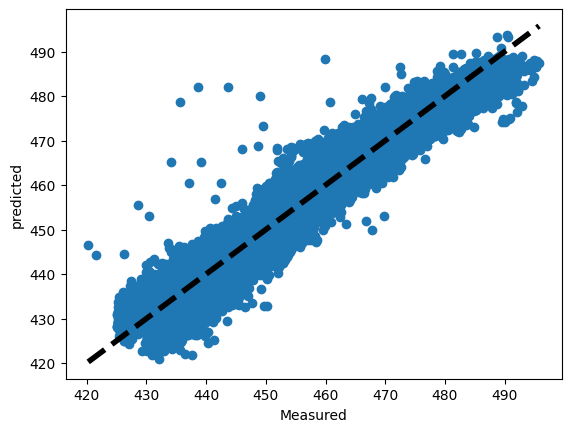

In [22]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('predicted')
plt.show()